# Motor Current signature Analysis:

Email : dravidsan@gmail.comm

### Importing Libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM


### Self defined Functions

In [2]:
## For reading data
def mod_data(file,col='value'):
    df_temp=pd.read_csv(file)
    df_temp=df_temp.T.copy()
    df_temp.reset_index(inplace=True)
    ttl(file)
    ## presence of unwanted row in last column of every data set
    print('Unwanted Row')
    display(df_temp[10_000:])
    df_temp=df_temp[0:10_000].copy()
    df_temp.columns=[col]
    df_temp=df_temp.astype(float)
    return df_temp

In [3]:
## Initializing Isolated forest
def initial_model(data,col,model,threshold=0.5):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[col])
    model.fit(data[col])
    scores=model.decision_function(data[col])
    anomalies = np.where(scores < threshold,0,1)
    data['anomalies']=anomalies
    return model,data

In [4]:
## Initializing Isolated forest :
def initial_model0(data,col,model):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[col])
    model.fit(data[col])
    return model,data
def initial_model1(data,col,model,threshold=0.5):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[col])
    scores=model.decision_function(data[col])
    anomalies = np.where(scores < threshold,0,1)
    data['anomalies']=anomalies
    return model,data

In [5]:
## Data Prep


def data_prep(data,col=['value'],diff=[0],avg=[0],std=[0],dropna=True):
    if diff[0]>0:
        for i in diff:
            data[['mdiff'+str(i)]]=data[col].rolling(window=i).diff()
    if avg[0]>0:
        for i in avg:
            data[['mavg'+str(i)]]=data[col].rolling(window=i).mean()
    if std[0]>0:
        for i in std:
            data[['mstd'+str(i)]]=data[col].rolling(window=i).std()
    if dropna ==True:
        data.dropna(inplace=True)
    return data
    

In [6]:
def Anomaly_Check(data,col,n=15):
    # data['anomalies_count']=data['anomalies'].rolling(window=20).sum()
    data[col].dropna(inplace=True)
    cc=data[col].value_counts().index.tolist()
    # anomal_val=data[col].astype(int).unique()
    for i in np.arange(len(cc)):
        if cc[i][0] > n:
            print('ALERT !!! Anomaly detected')
            break
        else:
            # print('Absence of Anomalies')
            print()
    data['anomaly_detected']=np.where(data[col]>n,'Anomaly','-')
    return data

In [7]:
def Anomaly_Detector(data):
    data=data.copy()
    data=data_prep(data,avg=[10,20],std=[20,50])
    col=data.columns
    model,data=initial_model1(data,col,model,threshold=0.1)
    
    print(data['anomalies'].value_counts())
    data['anomalies_count']=data['anomalies'].rolling(window=20).sum()
    print(data['anomalies_count'].value_counts())
    print('-------------------------------------------------------------')
    col=['anomalies_count']
    data=Anomaly_Check(data,col,n=15)
    display(data[data['anomaly_detected'] == 'Anomaly'].head(10))
    

In [8]:
## Title
def ttl(title,sym='*'):
    l=len(title)
    n=' '*10
    print(n+sym*(3*l+2))
    print(n+sym+' '*(l)+'\033[1m' +title+ '\033[0m'+' '*(l)+sym)
    print(n+sym*(3*l+2))

### Reading Datasets

In [9]:
addr=['data0 (1).txt', 'data109.txt', 'data112.txt', 'data88.txt', 'data89.txt', 'data9.txt']
dfs={}
dff=[]
n=0
for i in addr:
    c=i
    c=c.replace('.txt','')
    c=c.replace(' ','_')
    dff.append(c)
    a='************************************************'
    print(a)
    print(c)
    n=n+1
    print(a)
    c=mod_data(i)
    dfs['data'+str(n)]=c
    display(c)

************************************************
data0_(1)
************************************************
          *****************************************
          *             data0 (1).txt             *
          *****************************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,248.9580
9996,248.9590
9997,128.1255
9998,0.6117


************************************************
data109
************************************************
          ***********************************
          *           data109.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,128.0000
...,...
9995,0.8957
9996,0.8958
9997,0.8959
9998,0.8960


************************************************
data112
************************************************
          ***********************************
          *           data112.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,120.0000
1,0.0000
2,0.1000
3,120.1000
4,0.2000
...,...
9995,0.9043
9996,248.2520
9997,0.9044
9998,0.9045


************************************************
data88
************************************************
          ********************************
          *          data88.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,0.9022
9996,0.9023
9997,0.9024
9998,0.9025


************************************************
data89
************************************************
          ********************************
          *          data89.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,0.9070
9996,0.9071
9997,120.3000
9998,0.9072


************************************************
data9
************************************************
          *****************************
          *         data9.txt         *
          *****************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,128.0000
2,248.0000
3,0.1000
4,0.2000
...,...
9995,0.5980
9996,248.1194
9997,128.7540
9998,0.5981


##### We have removed the last row because it is unnecessary

#### Size and Shape

In [10]:
j=0
dt=pd.DataFrame()
for i in dfs.keys():
    print('Dataset :' ,dff[j])
    print('Size',dfs[i].size)
    print('Shape',dfs[i].shape)

Dataset : data0_(1)
Size 10000
Shape (10000, 1)
Dataset : data0_(1)
Size 10000
Shape (10000, 1)
Dataset : data0_(1)
Size 10000
Shape (10000, 1)
Dataset : data0_(1)
Size 10000
Shape (10000, 1)
Dataset : data0_(1)
Size 10000
Shape (10000, 1)
Dataset : data0_(1)
Size 10000
Shape (10000, 1)


#### Missing values and null value Imputation

In [11]:
j=0
dt=pd.DataFrame()
for i in dfs.keys():
    print('Dataset :' ,dff[j])
    print(dfs[i].isnull().sum())

Dataset : data0_(1)
value    0
dtype: int64
Dataset : data0_(1)
value    0
dtype: int64
Dataset : data0_(1)
value    0
dtype: int64
Dataset : data0_(1)
value    0
dtype: int64
Dataset : data0_(1)
value    0
dtype: int64
Dataset : data0_(1)
value    0
dtype: int64


##### Absence of missing or null values

### Exploratory data analysis

#### Info and description

In [12]:
j=0
dt=pd.DataFrame()
for i in dfs.keys():
    print('Dataset :' ,dff[j])
    print(dfs[i].info())
    display(dfs[i].describe().T)
    dt[dff[j]]=dfs[i].describe()
    j+=1
    print('-----------------------------------------------------')
display(dt)

Dataset : data0_(1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,60.274051,82.359246,0.0,0.324775,0.54985,120.74225,248.99


-----------------------------------------------------
Dataset : data109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,17.757835,54.081241,0.0,0.324775,0.54985,0.774825,248.99


-----------------------------------------------------
Dataset : data112
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,15.481215,49.124326,0.0,0.324775,0.54985,0.774825,248.99


-----------------------------------------------------
Dataset : data88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,15.659299,49.13075,0.0,0.324775,0.54985,0.774825,248.99


-----------------------------------------------------
Dataset : data89
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,14.611358,46.868627,0.0,0.324775,0.54985,0.774825,248.99


-----------------------------------------------------
Dataset : data9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


,count,mean,std,min,25%,50%,75%,max
value,10000.0,64.518958,86.37978,0.0,0.324775,0.54985,120.50325,248.999


-----------------------------------------------------


,data0_(1),data109,data112,data88,data89,data9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,60.274051,17.757835,15.481215,15.659299,14.611358,64.518958
std,82.359246,54.081241,49.124326,49.130750,46.868627,86.379780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324775,0.324775,0.324775,0.324775,0.324775,0.324775
50%,0.549850,0.549850,0.549850,0.549850,0.549850,0.549850
75%,120.742250,0.774825,0.774825,0.774825,0.774825,120.503250
max,248.990000,248.990000,248.990000,248.990000,248.990000,248.999000


##### All the datsets have 10,000 rows and single column of float datatype 
##### The irregular value in the last row has been removed earlier 
##### Data9 has the highest standard deviation and average
##### Data89 has the lowest standard deviation and average

### Univariate Analysis

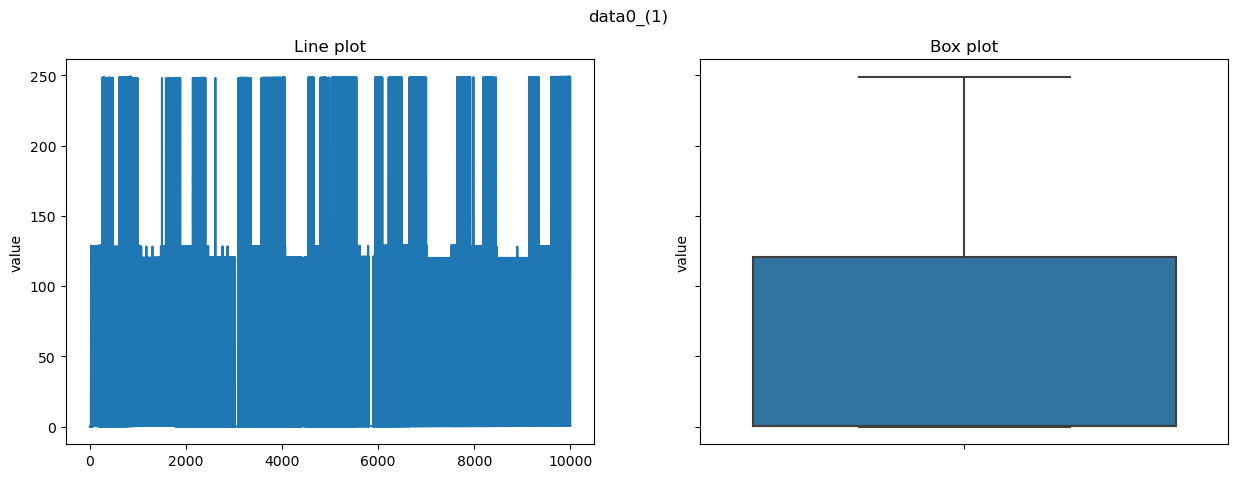

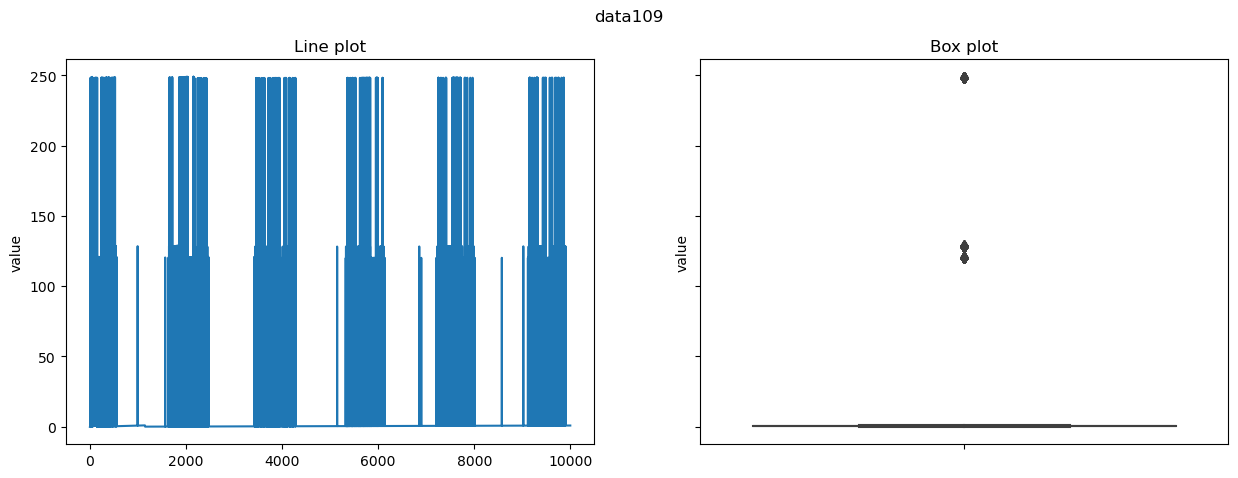

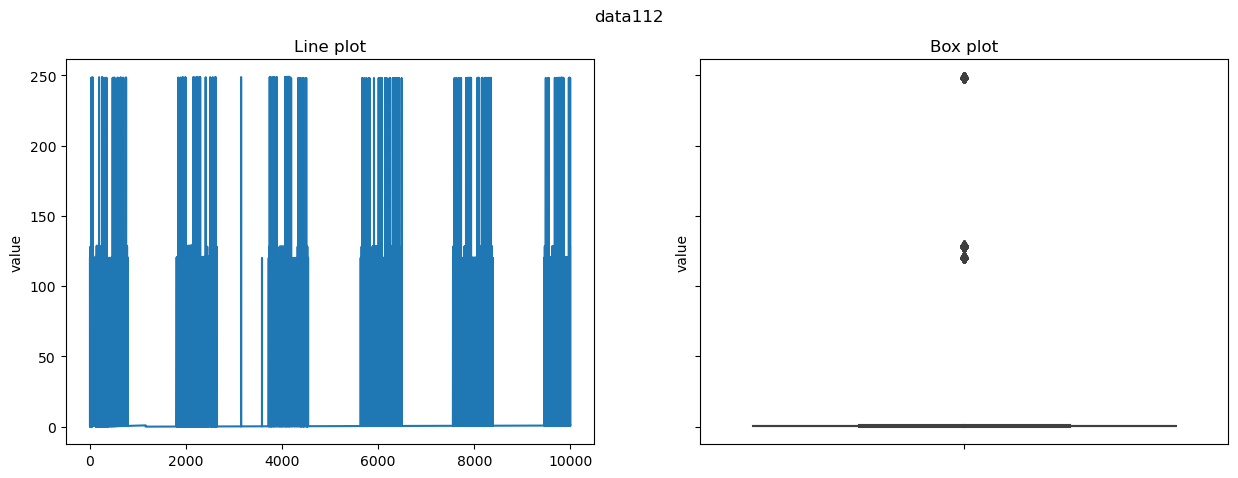

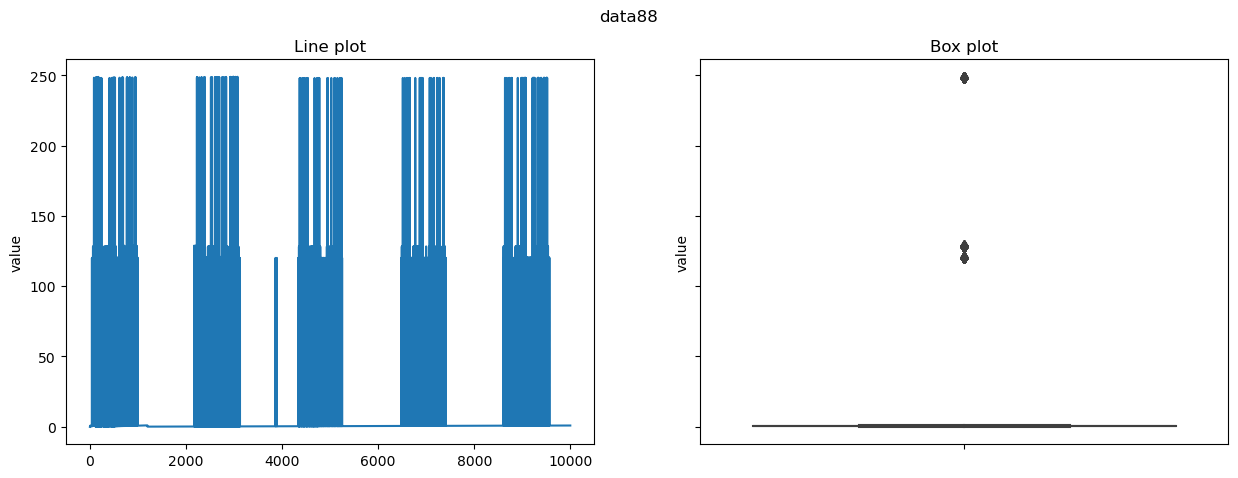

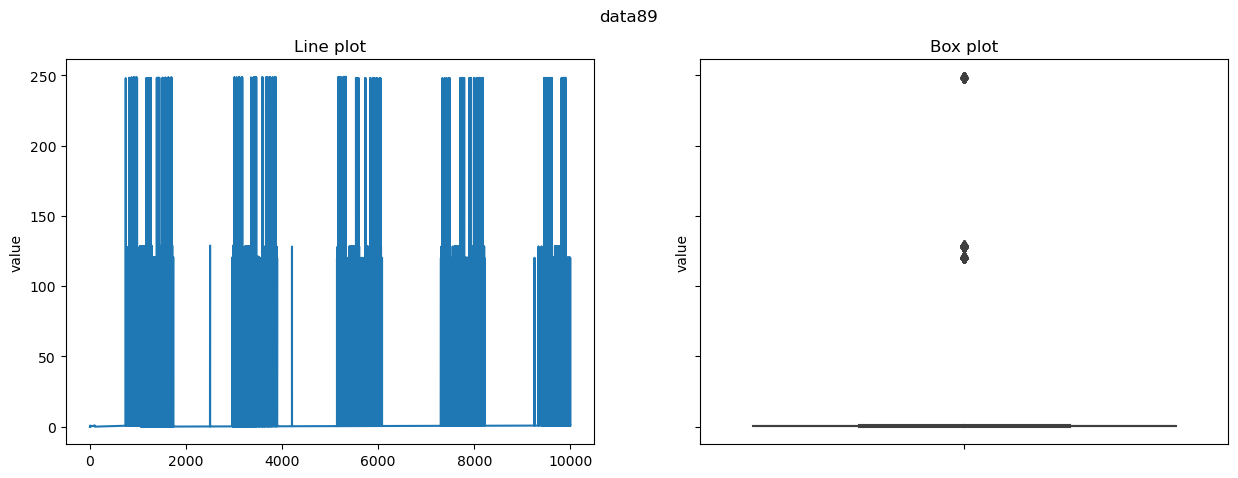

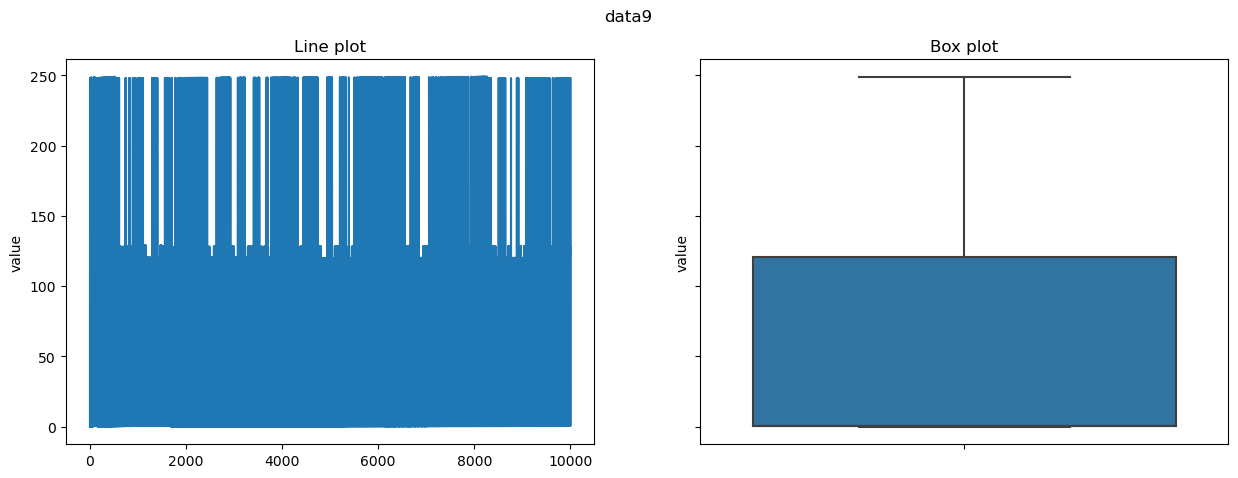

In [13]:
j=0
k=10_000

n=0
for i in dfs.keys():
    
    # sns.set_palette('Greys_r')
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(dff[n])
    sns.lineplot(ax=axes[0],y=dfs[i][j:k]['value'],x=dfs[i][j:k].index)
    axes[0].set_title('Line plot')
    sns.boxplot(ax=axes[1],y=dfs[i][j:k]['value'])
    axes[1].set_title('Box plot')

    plt.show()
    n+=1

 All datasets show periodicity  Data89 and data_0(1) have  lower troughs compared to the other datsets.
 
 All datasets have Outliers except datsets  Data89 and data_0(1)

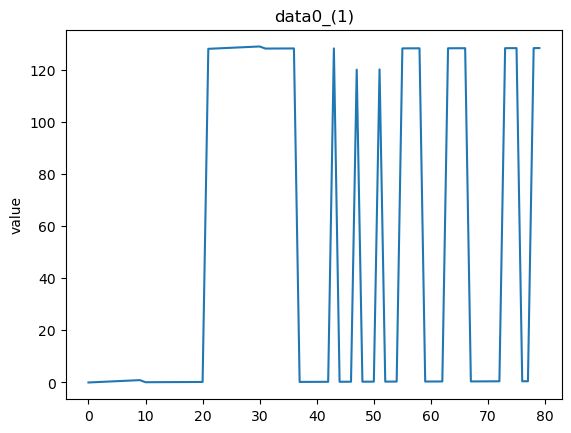

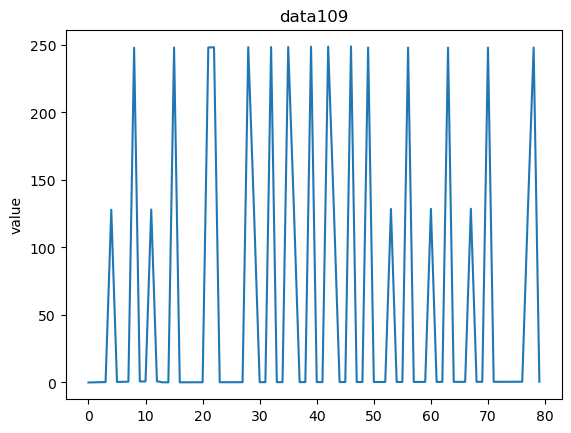

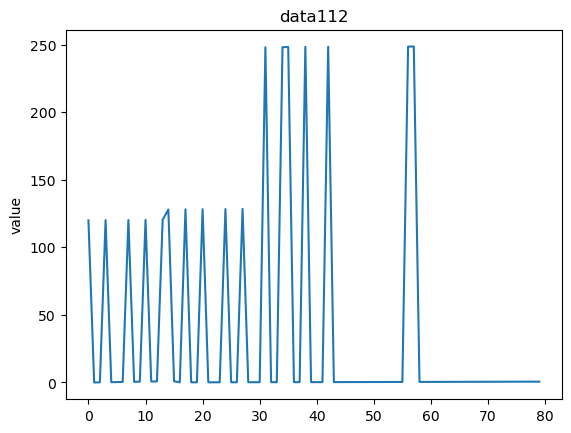

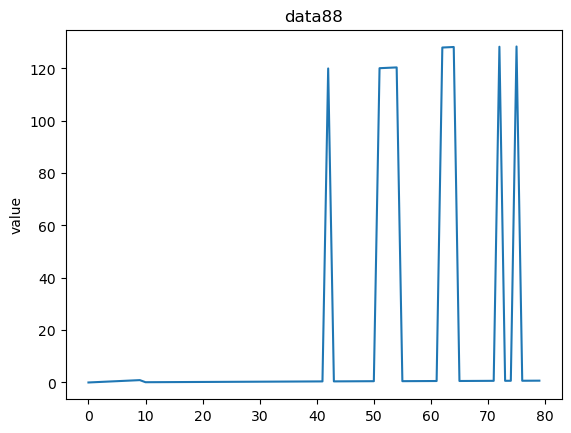

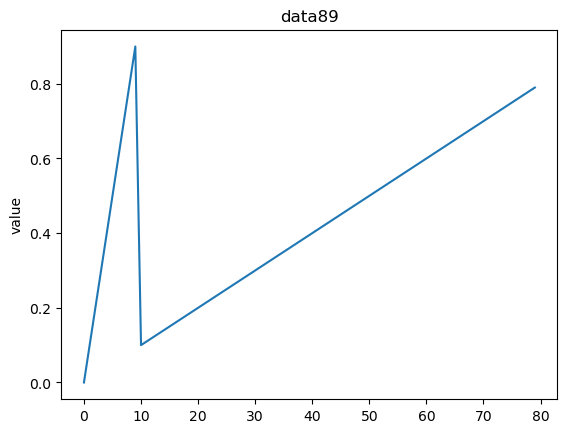

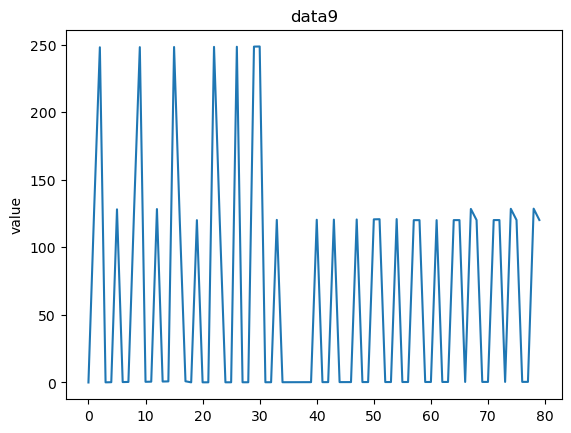

In [14]:
## Line plot for few rows of data 
j=0
k=80

n=0
for i in dfs.keys():
    plt.title(dff[n])
    n+=1
    sns.lineplot(y=dfs[i][j:k]['value'],x=dfs[i][j:k].index)
    plt.show()


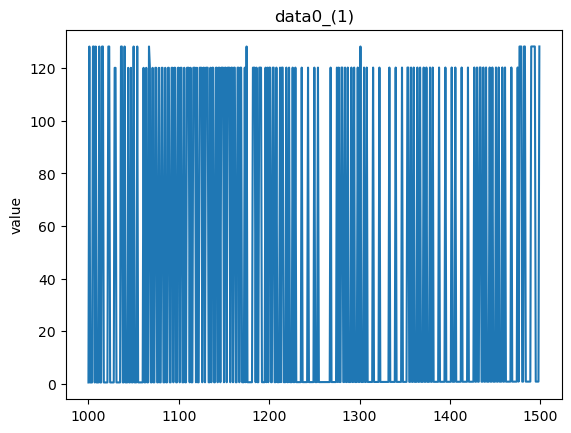

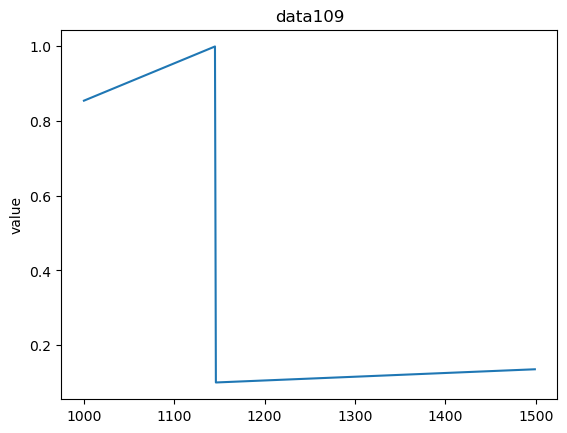

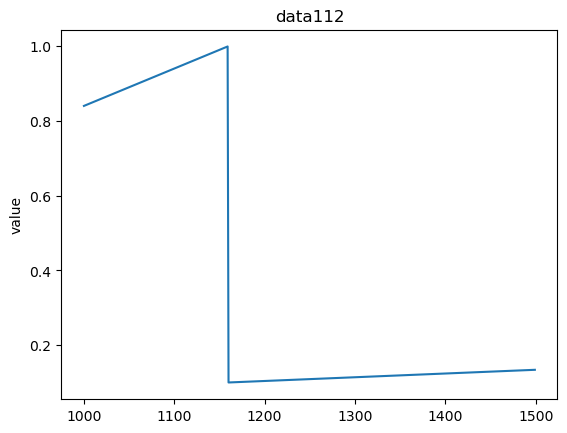

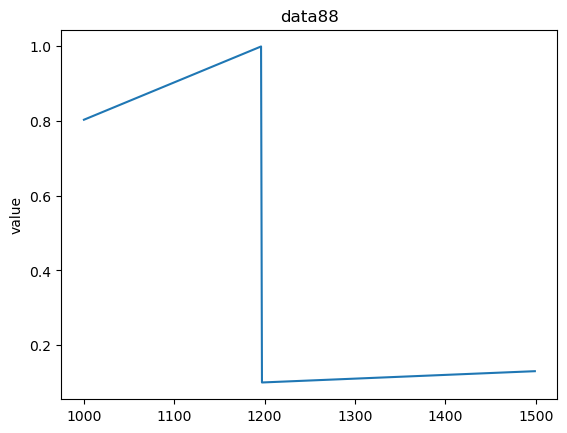

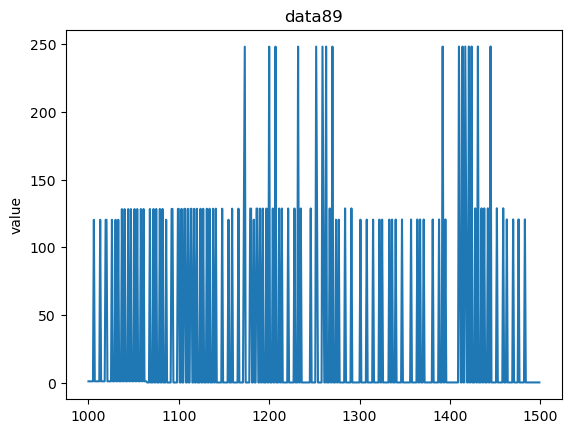

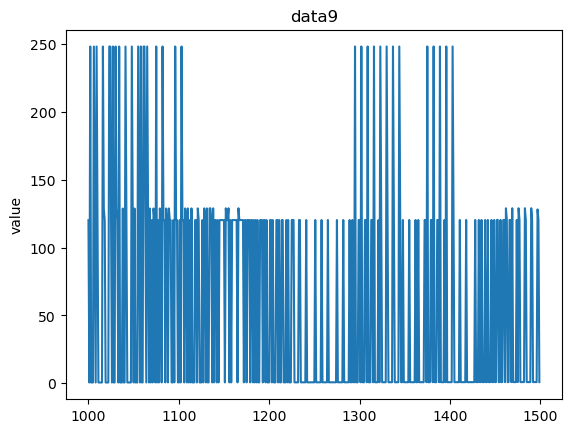

In [15]:
## Line plot for few rows of data 
j=1000
k=1500
n=0
for i in dfs.keys():
#     plt.figure(figsize=(30,12))
    plt.title(dff[n])
    n+=1
    sns.lineplot(y=dfs[i][j:k]['value'],x=dfs[i][j:k].index)
    plt.show()

#### Presence of irregular data in trough area of 'data109', 'data112', 'data88', 'data89' datasets

### Model

#### Isolated Forest

data0_(1)
0    9735
1     265
Name: anomalies, dtype: int64


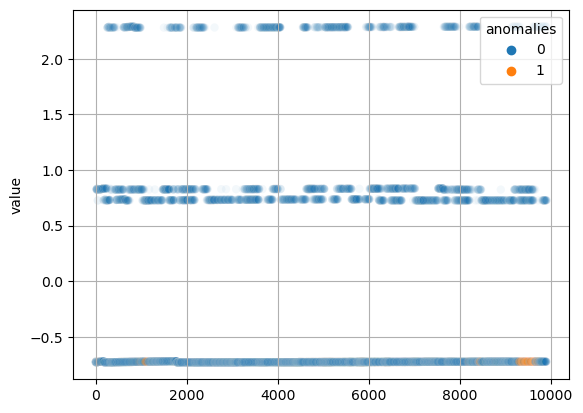

data109
0    9776
1     224
Name: anomalies, dtype: int64


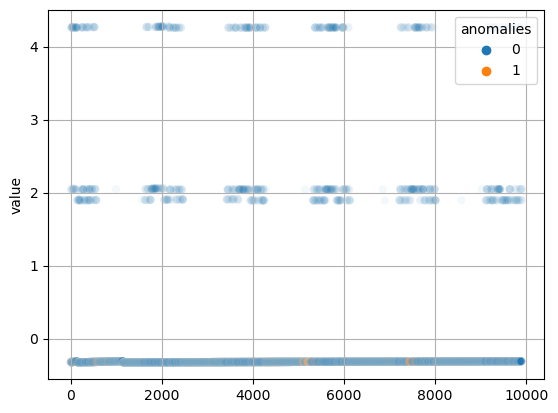

data112
0    9720
1     280
Name: anomalies, dtype: int64


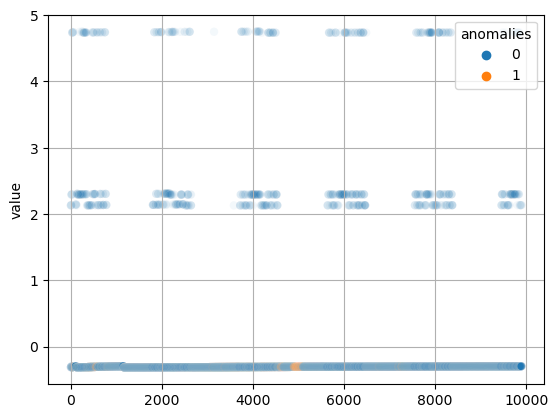

data88
0    9679
1     321
Name: anomalies, dtype: int64


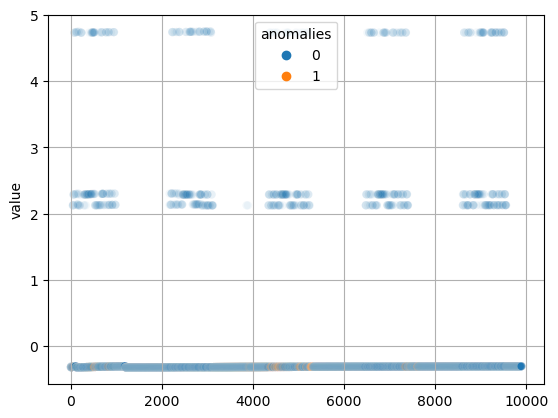

data89
0    9711
1     289
Name: anomalies, dtype: int64


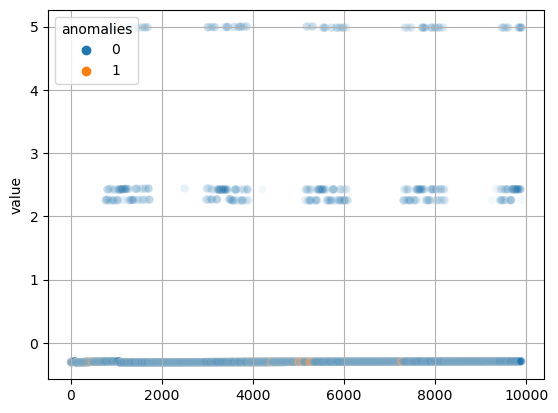

data9
0    9044
1     956
Name: anomalies, dtype: int64


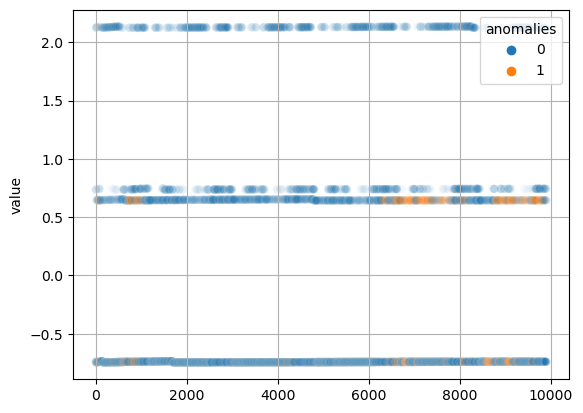

In [19]:

n=0
for i in dfs.keys():
    data=dfs[i].copy()
#     data.reset_index(inplace=True)
#     col=['value','index']
    data=dfs[i]
    col=['value']
    model= IsolationForest(n_estimators=100, contamination='auto', max_samples=1.0, random_state=0)
    
    model,data=initial_model(data,col,model,threshold=0.05)
    j=0
    k=9900
    print(dff[n])
    print(data['anomalies'].value_counts())
    sns.color_palette('Blues')
    # plt.title(dff[n])
    sns.scatterplot(y=dfs[i][j:k]['value'],x=dfs[i][j:k].index,hue=dfs[i][j:k]['anomalies'],alpha=0.05)
    plt.grid()
    plt.show()
    n=n+1

##### Treeshold of 0.5 - 0.2  doesn't produce any anomalies
##### We have taken treshold to 0.05

### Moving average, Standard deviation

0    8583
1    1368
Name: anomalies, dtype: int64
0.0     5999
8.0      407
4.0      374
6.0      361
5.0      324
9.0      324
7.0      320
10.0     285
2.0      283
3.0      273
11.0     267
1.0      258
12.0     167
13.0     106
14.0      79
15.0      57
16.0      34
17.0      13
18.0       1
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


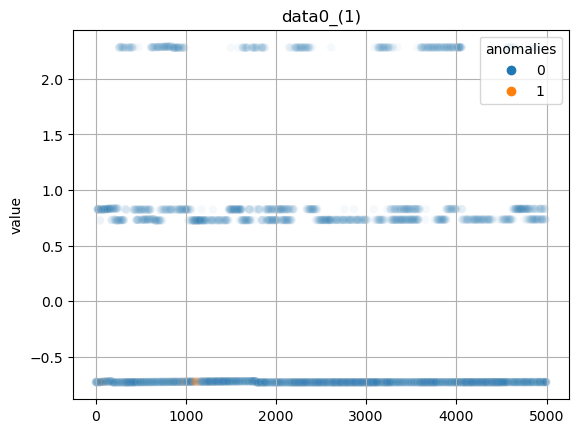

0    5976
1    3975
Name: anomalies, dtype: int64
0.0     5707
20.0    3594
19.0     128
18.0      96
2.0       39
16.0      32
1.0       28
3.0       26
4.0       26
6.0       26
13.0      25
11.0      24
5.0       23
9.0       22
12.0      20
8.0       20
17.0      20
7.0       20
10.0      20
14.0      18
15.0      18
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


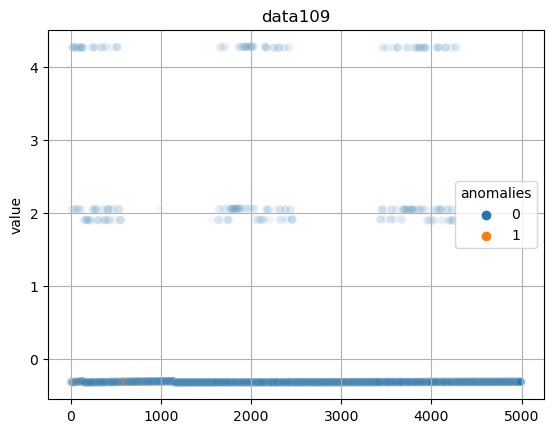

0    5606
1    4345
Name: anomalies, dtype: int64
0.0     5218
20.0    3947
19.0      83
1.0       81
17.0      61
18.0      58
6.0       47
16.0      44
4.0       39
7.0       37
8.0       37
3.0       36
2.0       35
15.0      35
11.0      32
5.0       29
14.0      25
13.0      24
12.0      22
9.0       22
10.0      20
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


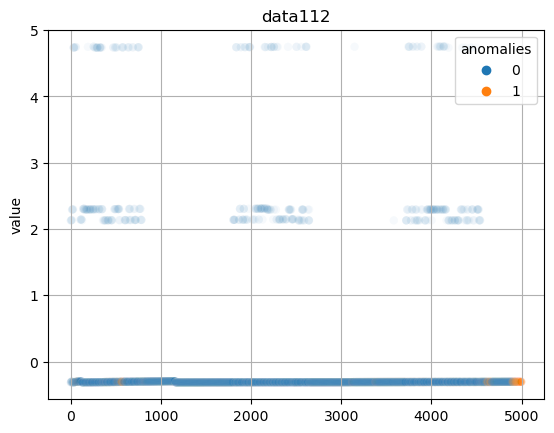

0    5471
1    4480
Name: anomalies, dtype: int64
0.0     5256
20.0    4222
19.0      77
18.0      48
9.0       28
3.0       28
2.0       25
17.0      25
7.0       22
10.0      21
11.0      19
8.0       18
12.0      18
5.0       18
1.0       17
6.0       17
4.0       17
13.0      14
14.0      14
15.0      14
16.0      14
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


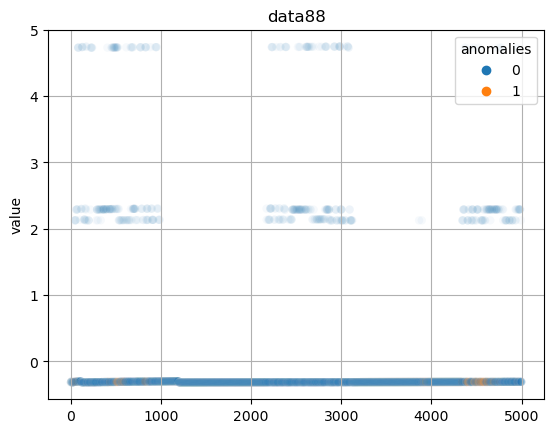

0    5430
1    4521
Name: anomalies, dtype: int64
0.0     5033
20.0    3911
19.0     210
18.0      83
17.0      75
16.0      57
2.0       54
15.0      49
13.0      46
7.0       45
3.0       44
14.0      40
1.0       39
11.0      34
12.0      34
9.0       31
8.0       31
6.0       30
10.0      30
5.0       29
4.0       27
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


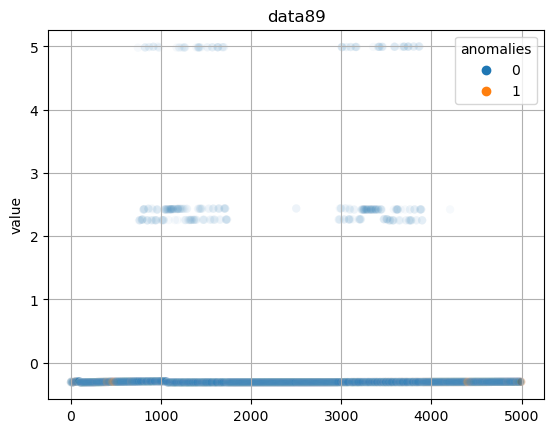

0    9890
1      61
Name: anomalies, dtype: int64
0.0     9430
2.0      207
1.0      141
3.0       56
4.0       55
5.0       22
7.0        6
9.0        5
6.0        4
10.0       4
8.0        2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


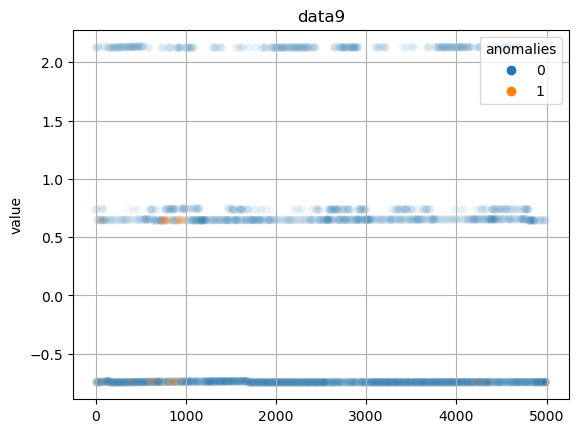

In [21]:
n=0
for i in dfs.keys():
    df=dfs[i]
    data=df.copy()
#     data['value_diff1']=data['value'].diff()
#     data['value_diff2']=data['value'].diff(periods=2)
#     data['mavg020']=data['value'].rolling(window=20).mean()
    data['mavg50']=data['value'].rolling(window=50).mean()
    data['mstd20']=data['value'].rolling(window=20).std()
    data['mstd50']=data['value'].rolling(window=50).std()
    data['mstd4']=data['value'].rolling(window=4).std()
    col=data.columns
    data.dropna(inplace=True)
    model= IsolationForest(n_estimators=100, contamination='auto', max_samples=1.0, random_state=0)
    model,data=initial_model(data,col,model,threshold=0.1)
    print(data['anomalies'].value_counts())
    data['anomalies_count']=data['anomalies'].rolling(window=20).sum()
    print(data['anomalies_count'].value_counts())
    print('-------------------------------------------------------------')
    j=0
    k=5000
    plt.title(dff[n])
    sns.scatterplot(y=dfs[i][j:k]['value'],x=dfs[i][j:k].index,hue=dfs[i][j:k]['anomalies'],alpha=0.04)
    plt.grid()
    plt.show()
    n=n+1

#### In order to further refine our results we have created a new column on the basis of anomaly column where we have found the moving sum where we can take a particular value as a threshold for finding Anomaly

### Moving Average,standard deviation using window function

In [ ]:
addr=['data0 (1).txt', 'data109.txt', 'data112.txt', 'data88.txt', 'data89.txt', 'data9.txt']
dfs={}
dff=[]
n=0
for i in addr:
    c=i
    c=c.replace('.txt','')
    c=c.replace(' ','_')
    dff.append(c)
    a='************************************************'
    print(a)
    print(c)
    n=n+1
    print(a)
    c=mod_data(i)
    dfs['data'+str(n)]=c
    display(c)

************************************************
data0_(1)
************************************************
data0 (1).txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,248.9580
9996,248.9590
9997,128.1255
9998,0.6117


************************************************
data109
************************************************
data109.txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,128.0000
...,...
9995,0.8957
9996,0.8958
9997,0.8959
9998,0.8960


************************************************
data112
************************************************
data112.txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,120.0000
1,0.0000
2,0.1000
3,120.1000
4,0.2000
...,...
9995,0.9043
9996,248.2520
9997,0.9044
9998,0.9045


************************************************
data88
************************************************
data88.txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,0.9022
9996,0.9023
9997,0.9024
9998,0.9025


************************************************
data89
************************************************
data89.txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,0.1000
2,0.2000
3,0.3000
4,0.4000
...,...
9995,0.9070
9996,0.9071
9997,120.3000
9998,0.9072


************************************************
data9
************************************************
data9.txt
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0000
1,128.0000
2,248.0000
3,0.1000
4,0.2000
...,...
9995,0.5980
9996,248.1194
9997,128.7540
9998,0.5981


In [ ]:
dfs0={}
k=0
for i in dfs.keys():
    df=dfs[i]
    data=df.copy()
    print('Dataset :',i,dff[k])
    data=data_prep(data,avg=[10,20],std=[20,50])
    col=data.columns
    model= IsolationForest(n_estimators=100, contamination='auto', max_samples=1.0, random_state=0)
    model,data=initial_model(data,col,model,threshold=0.1)
    
    print(data['anomalies'].value_counts())
    data['anomalies_count']=data['anomalies'].rolling(window=20).sum()
    print(data['anomalies_count'].value_counts())
    print('-------------------------------------------------------------')

    col=['anomalies_count']
    data=Anomaly_Check(data,col,n=15)
    display(data[data['anomaly_detected'] == 'Anomaly'].head())
    dfs0[i]=data
    k=k+1

Dataset : data1 data0_(1)
0    9461
1     490
Name: anomalies, dtype: int64
0.0     7537
1.0      711
3.0      310
2.0      298
4.0      217
5.0      208
6.0      154
8.0      110
7.0      106
10.0      61
9.0       60
11.0      56
12.0      47
13.0      26
14.0      24
15.0       7
Name: anomalies_final, dtype: int64
-------------------------------------------------------------


















,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected


Dataset : data2 data109
0    6936
1    3015
Name: anomalies, dtype: int64
0.0     6619
20.0    2534
19.0     190
16.0      62
17.0      51
6.0       41
15.0      39
10.0      33
11.0      31
8.0       31
1.0       30
3.0       30
18.0      30
4.0       30
9.0       28
13.0      28
7.0       26
12.0      25
14.0      25
5.0       25
2.0       24
Name: anomalies_final, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected
2650,-0.322431,-0.695304,-0.755713,-0.846906,-0.938718,1,16.0,Anomaly
2651,-0.322429,-0.695300,-0.755708,-0.846906,-0.938718,1,17.0,Anomaly
2652,-0.322427,-0.695296,-0.755704,-0.846906,-0.938718,1,17.0,Anomaly
2653,-0.322426,-0.695292,-0.755699,-0.846906,-0.938718,1,17.0,Anomaly
2654,-0.322424,-0.695288,-0.755695,-0.846906,-0.938718,1,17.0,Anomaly


Dataset : data3 data112
0    6957
1    2994
Name: anomalies, dtype: int64
0.0     6643
20.0    2703
2.0       57
15.0      49
7.0       44
1.0       36
8.0       34
9.0       34
14.0      33
19.0      33
16.0      33
10.0      30
13.0      27
17.0      27
18.0      27
5.0       23
11.0      23
4.0       21
6.0       19
12.0      18
3.0       18
Name: anomalies_final, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected
3029,-0.307887,-0.665810,-0.753813,-0.832204,-0.927138,1,16.0,Anomaly
3030,-0.307885,-0.665805,-0.753808,-0.832204,-0.927138,1,17.0,Anomaly
3031,-0.307883,-0.665801,-0.753803,-0.832204,-0.927138,1,18.0,Anomaly
3032,-0.307881,-0.665797,-0.753798,-0.832204,-0.927138,1,19.0,Anomaly
3033,-0.307879,-0.665792,-0.753793,-0.832204,-0.927138,1,20.0,Anomaly


Dataset : data4 data88
0    7958
1    1993
Name: anomalies, dtype: int64
0.0     7395
20.0    1348
19.0     132
17.0      94
3.0       78
18.0      74
16.0      74
1.0       72
14.0      62
2.0       61
12.0      61
11.0      61
4.0       58
15.0      53
10.0      50
6.0       46
8.0       45
9.0       44
5.0       44
13.0      40
7.0       40
Name: anomalies_final, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected
3490,-0.313115,-0.675607,-0.752238,-0.838704,-0.934234,1,16.0,Anomaly
3491,-0.313112,-0.675603,-0.752233,-0.838704,-0.934234,1,16.0,Anomaly
3492,-0.313110,-0.675599,-0.752228,-0.838704,-0.934234,1,16.0,Anomaly
3497,-0.313100,-0.675577,-0.752203,-0.838704,-0.934234,1,16.0,Anomaly
3498,-0.313098,-0.675572,-0.752199,-0.838704,-0.934234,1,17.0,Anomaly


Dataset : data5 data89
0    5992
1    3959
Name: anomalies, dtype: int64
0.0     5836
20.0    3810
8.0       22
17.0      18
13.0      18
19.0      17
18.0      17
9.0       17
5.0       16
16.0      15
12.0      15
11.0      14
14.0      14
15.0      14
10.0      14
3.0       13
1.0       13
2.0       13
7.0       12
6.0       12
4.0       12
Name: anomalies_final, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected
1922,-0.308912,-0.664912,-0.737514,-0.804632,-0.887628,1,16.0,Anomaly
1923,-0.308909,-0.664907,-0.737509,-0.804632,-0.887628,1,17.0,Anomaly
1924,-0.308907,-0.664902,-0.737504,-0.804632,-0.887628,1,18.0,Anomaly
1925,-0.308905,-0.664898,-0.737499,-0.804632,-0.887628,1,19.0,Anomaly
1926,-0.308903,-0.664893,-0.737494,-0.804632,-0.887628,1,19.0,Anomaly


Dataset : data6 data9
0    9583
1     368
Name: anomalies, dtype: int64
0.0     8255
1.0      483
6.0      259
2.0      194
5.0      147
3.0      141
4.0      125
11.0      76
12.0      59
7.0       57
9.0       37
10.0      37
8.0       35
13.0      27
Name: anomalies_final, dtype: int64
-------------------------------------------------------------
















,value,mavg10,mavg20,mstd20,mstd50,anomalies,anomalies_final,anomaly_detected


##### Based on the threshold set above we see except Datasets data0_(1)and data9 all other datasets have anomalies

In [21]:
addr

['data0 (1).txt',
 'data109.txt',
 'data112.txt',
 'data88.txt',
 'data89.txt',
 'data9.txt']

### Model Deployment

#### Isolation Forest

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

In [29]:
def initial_model0(data,col,model):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[col])
    model.fit(data[col])
    return model,data

In [34]:
def isolation_forest(data,col,model,thresh=0.1):
    scores=model.decision_function(data[col])
    anomalies = np.where(scores < thresh,0,1)
    data['anomalies']=anomalies

    return data

In [35]:
def Deployment_(file,model,avg=[0],std=[0],thresh=0.05,func=isolation_forest,rw=20,prep=True):
    data=mod_data(file,col='value')
    display(data.head())
    print('Null values:',data.isnull().sum())
    data.dropna(inplace=True)
    print('After Data Preparation:')
    display(data.head())
    if prep == True: 
        data=data_prep(data,col=['value'],diff=[0],avg=avg,std=std,dropna=True)
    else:
        data=data
    col=data.columns
    model,data=initial_model0(data,col,model)
    col=data.columns
    data=func(data,col,model,thresh=thresh)
    print(data['anomalies'].value_counts())
    data['anomalies_count']=data['anomalies'].rolling(window=rw).sum()
    print(data['anomalies_count'].value_counts())
    print('-------------------------------------------------------------')
    col=['anomalies_count']
    data=Anomaly_Check(data,col,n=15)
    display(data[data['anomaly_detected'] == 'Anomaly'].head(10))
    return data

          *****************************************
          *             data0 (1).txt             *
          *****************************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    9326
1     625
Name: anomalies, dtype: int64
0.0     7282
1.0      610
2.0      372
3.0      271
6.0      228
4.0      216
7.0      212
5.0      195
8.0      129
9.0       99
10.0      86
11.0      73
12.0      65
13.0      49
14.0      36
15.0       9
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


















,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected


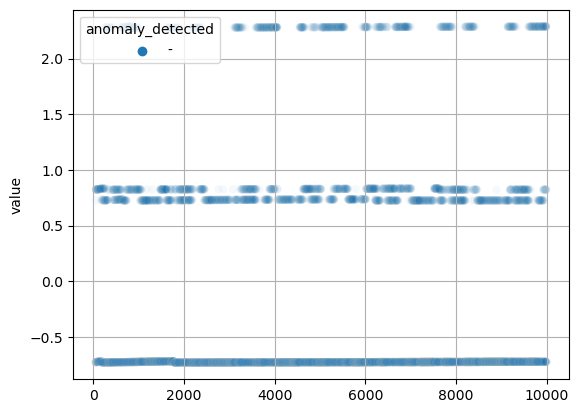

          ***********************************
          *           data109.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,128.0


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,128.0


0    7033
1    2918
Name: anomalies, dtype: int64
0.0     6744
20.0    2526
19.0     103
18.0      70
16.0      42
2.0       40
13.0      37
17.0      33
11.0      33
1.0       32
6.0       32
10.0      31
14.0      30
15.0      30
9.0       26
12.0      24
4.0       23
7.0       21
8.0       20
5.0       18
3.0       17
Name: anomalies_count, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected
2703,-0.322332,-0.755482,-0.695092,-0.846906,-0.938718,1,16.0,Anomaly
2704,-0.322331,-0.755478,-0.695088,-0.846906,-0.938718,1,17.0,Anomaly
2705,-0.322329,-0.755473,-0.695084,-0.846906,-0.938718,1,18.0,Anomaly
2706,-0.322327,-0.755469,-0.695080,-0.846906,-0.938718,1,19.0,Anomaly
2707,-0.322325,-0.755465,-0.695076,-0.846906,-0.938718,1,19.0,Anomaly
2708,-0.322323,-0.755460,-0.695072,-0.846906,-0.938718,1,20.0,Anomaly
2709,-0.322321,-0.755456,-0.695068,-0.846906,-0.938718,1,20.0,Anomaly
2710,-0.322319,-0.755452,-0.695064,-0.846906,-0.938718,1,20.0,Anomaly
2711,-0.322318,-0.755447,-0.695060,-0.846906,-0.938718,1,20.0,Anomaly
2712,-0.322316,-0.755443,-0.695056,-0.846906,-0.938718,1,20.0,Anomaly


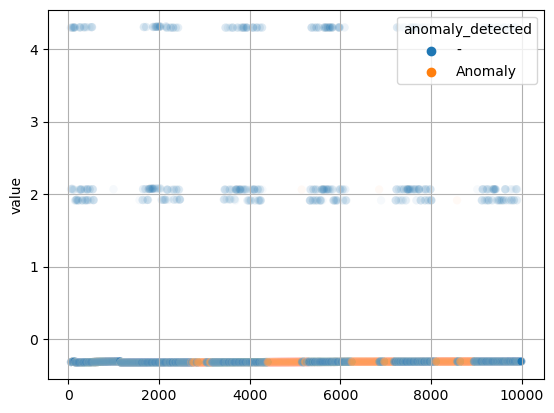

          ***********************************
          *           data112.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,120.0
1,0.0
2,0.1
3,120.1
4,0.2


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,120.0
1,0.0
2,0.1
3,120.1
4,0.2


0    6622
1    3329
Name: anomalies, dtype: int64
0.0     6346
20.0    3129
1.0       54
5.0       38
8.0       36
3.0       36
15.0      25
14.0      25
11.0      24
12.0      23
7.0       23
17.0      21
2.0       21
9.0       21
13.0      19
6.0       16
16.0      16
4.0       15
19.0      15
10.0      15
18.0      14
Name: anomalies_count, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected
2983,-0.307981,-0.754044,-0.666014,-0.832204,-0.927138,1,16.0,Anomaly
2984,-0.307979,-0.754039,-0.666009,-0.832204,-0.927138,1,17.0,Anomaly
2985,-0.307977,-0.754034,-0.666005,-0.832204,-0.927138,1,18.0,Anomaly
2986,-0.307975,-0.754029,-0.666000,-0.832204,-0.927138,1,18.0,Anomaly
2987,-0.307973,-0.754024,-0.665996,-0.832204,-0.927138,1,19.0,Anomaly
2988,-0.307971,-0.754019,-0.665992,-0.832204,-0.927138,1,19.0,Anomaly
2989,-0.307969,-0.754014,-0.665987,-0.832204,-0.927138,1,20.0,Anomaly
2990,-0.307967,-0.754009,-0.665983,-0.832204,-0.927138,1,20.0,Anomaly
2991,-0.307965,-0.754004,-0.665978,-0.832204,-0.927138,1,20.0,Anomaly
2992,-0.307963,-0.753999,-0.665974,-0.832204,-0.927138,1,20.0,Anomaly


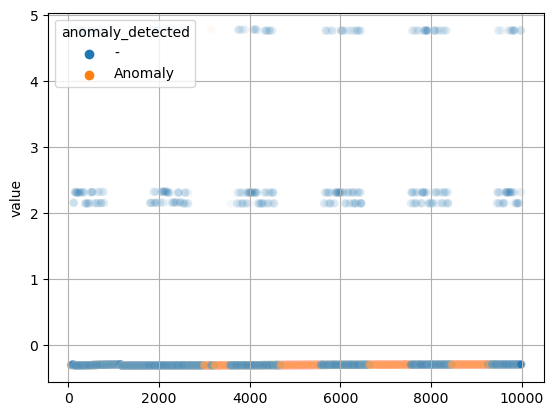

          ********************************
          *          data88.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    7541
1    2410
Name: anomalies, dtype: int64
0.0     7234
20.0    1980
19.0      79
18.0      75
17.0      60
15.0      52
16.0      50
14.0      47
1.0       35
11.0      34
3.0       31
10.0      30
7.0       29
8.0       28
13.0      27
9.0       26
6.0       26
12.0      23
5.0       23
4.0       22
2.0       21
Name: anomalies_count, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected
3456,-0.313184,-0.752403,-0.675756,-0.838704,-0.934234,1,16.0,Anomaly
3457,-0.313182,-0.752399,-0.675752,-0.838704,-0.934234,1,16.0,Anomaly
3458,-0.313180,-0.752394,-0.675748,-0.838704,-0.934234,1,17.0,Anomaly
3459,-0.313177,-0.752389,-0.675743,-0.838704,-0.934234,1,18.0,Anomaly
3460,-0.313175,-0.752384,-0.675739,-0.838704,-0.934234,1,18.0,Anomaly
3461,-0.313173,-0.752379,-0.675735,-0.838704,-0.934234,1,19.0,Anomaly
3462,-0.313171,-0.752374,-0.675730,-0.838704,-0.934234,1,19.0,Anomaly
3463,-0.313169,-0.752369,-0.675726,-0.838704,-0.934234,1,19.0,Anomaly
3464,-0.313167,-0.752364,-0.675721,-0.838704,-0.934234,1,19.0,Anomaly
3465,-0.313165,-0.752360,-0.675717,-0.838704,-0.934234,1,19.0,Anomaly


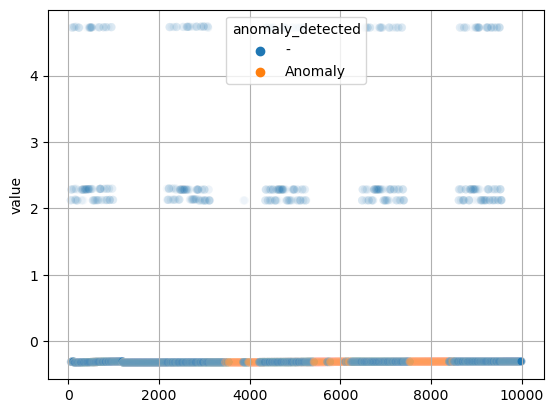

          ********************************
          *          data89.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    5942
1    4009
Name: anomalies, dtype: int64
0.0     5791
20.0    3822
19.0      49
17.0      25
12.0      21
18.0      19
16.0      19
15.0      17
14.0      16
13.0      15
2.0       14
1.0       14
10.0      13
4.0       13
3.0       12
9.0       12
8.0       12
7.0       12
6.0       12
5.0       12
11.0      12
Name: anomalies_count, dtype: int64
-------------------------------------------------------------

ALERT !!! Anomaly detected


,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected
1932,-0.308890,-0.737463,-0.664866,-0.804632,-0.887628,1,16.0,Anomaly
1933,-0.308888,-0.737458,-0.664861,-0.804632,-0.887628,1,17.0,Anomaly
1934,-0.308886,-0.737453,-0.664857,-0.804632,-0.887628,1,18.0,Anomaly
1935,-0.308884,-0.737448,-0.664852,-0.804632,-0.887628,1,19.0,Anomaly
1936,-0.308882,-0.737443,-0.664847,-0.804632,-0.887628,1,20.0,Anomaly
1937,-0.308880,-0.737438,-0.664843,-0.804632,-0.887628,1,20.0,Anomaly
1938,-0.308878,-0.737433,-0.664838,-0.804632,-0.887628,1,20.0,Anomaly
1939,-0.308875,-0.737428,-0.664834,-0.804632,-0.887628,1,20.0,Anomaly
1940,-0.308873,-0.737422,-0.664829,-0.804632,-0.887628,1,20.0,Anomaly
1941,-0.308871,-0.737417,-0.664824,-0.804632,-0.887628,1,20.0,Anomaly


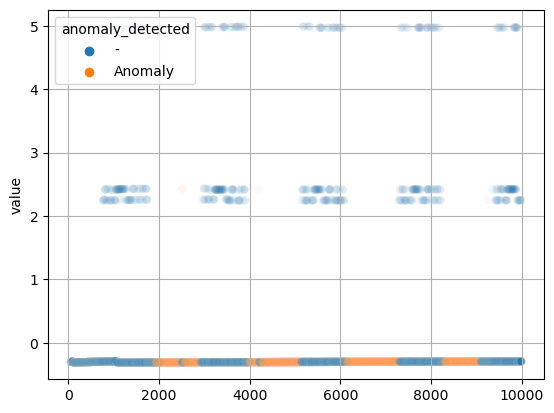

          *****************************
          *         data9.txt         *
          *****************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,128.0
2,248.0
3,0.1
4,0.2


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,128.0
2,248.0
3,0.1
4,0.2


0    9592
1     359
Name: anomalies, dtype: int64
0.0     8358
1.0      413
6.0      285
2.0      192
3.0      128
5.0      127
4.0       89
7.0       68
12.0      65
11.0      64
8.0       56
10.0      35
9.0       34
13.0      18
Name: anomalies_count, dtype: int64
-------------------------------------------------------------
















,value,mavg20,mavg10,mstd20,mstd50,anomalies,anomalies_count,anomaly_detected


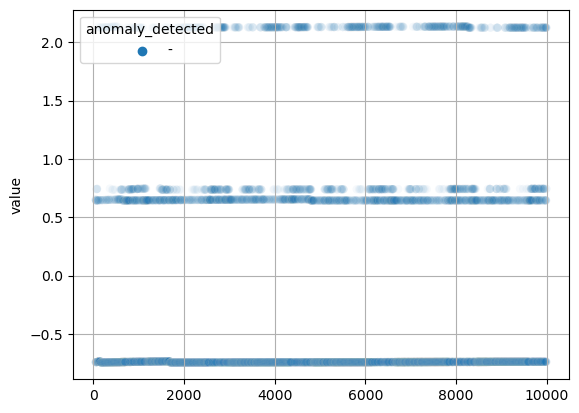

In [43]:
for i in addr:
    file=i
    model= IsolationForest(n_estimators=100, contamination='auto',max_samples=1.0, random_state=0)
    data=Deployment_(file,model,avg=[20,10],std=[20,50],thresh=0.1,rw=20,func=isolation_forest)
    j=100
    k=9900
    # plt.title(dff[n])
    sns.scatterplot(y=data['value'],x=data.index,hue=data['anomaly_detected'],alpha=0.04)
    plt.grid()
    plt.show()

### One_class SVM

One-Class SVM is an unsupervised learning technique to learn the ability to differentiate the test samples of a particular class from other classes. 1-SVM is one of the most convenient methods to approach OCC problem statements including AD. 1-SVM works on the basic idea of minimizing the hypersphere of the single class of examples in training data and considers all the other samples outside the hypersphere to be outliers or out of training data distribution.

In [99]:
def oneclass_SVM(data,col,model,thresh=0.1):
    predict=model.predict(data[col])
    anomalies = np.where(predict == -1,1,0)
    data['anomalies']=anomalies
    return data

In [110]:
for i in addr:
    file=i
    model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)
    data=Deployment_(file,model,avg=[30],std=[50],thresh=0.5,rw=20,
        func=oneclass_SVM,prep=False)

          *****************************************
          *             data0 (1).txt             *
          *****************************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    9978
1      22
Name: anomalies, dtype: int64
0.0     9909
2.0       22
1.0       13
3.0        6
14.0       5
4.0        3
13.0       3
11.0       2
15.0       2
12.0       2
8.0        2
10.0       2
9.0        2
7.0        2
6.0        2
5.0        2
16.0       2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------
















ALERT !!! Anomaly detected


,value,anomalies,anomalies_count,anomaly_detected
1799,-0.730647,1,16.0,Anomaly
1800,-0.730646,1,16.0,Anomaly


          ***********************************
          *           data109.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,128.0


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,128.0


0    9899
1     101
Name: anomalies, dtype: int64
0.0     9544
3.0      100
1.0       89
4.0       70
2.0       57
5.0       50
20.0      24
6.0       21
7.0        2
8.0        2
9.0        2
11.0       2
12.0       2
13.0       2
14.0       2
15.0       2
16.0       2
17.0       2
18.0       2
19.0       2
10.0       2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------






ALERT !!! Anomaly detected


,value,anomalies,anomalies_count,anomaly_detected
1161,-0.326494,1,16.0,Anomaly
1162,-0.326492,1,17.0,Anomaly
1163,-0.326491,1,18.0,Anomaly
1164,-0.326489,1,19.0,Anomaly
1165,-0.326487,1,20.0,Anomaly
1166,-0.326485,1,20.0,Anomaly
1167,-0.326483,1,20.0,Anomaly
1168,-0.326481,1,20.0,Anomaly
1169,-0.326480,1,20.0,Anomaly
1170,-0.326478,1,20.0,Anomaly


          ***********************************
          *           data112.txt           *
          ***********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,120.0
1,0.0
2,0.1
3,120.1
4,0.2


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,120.0
1,0.0
2,0.1
3,120.1
4,0.2


0    9900
1     100
Name: anomalies, dtype: int64
0.0     9333
1.0      281
2.0      156
3.0       99
4.0       43
20.0      23
5.0       18
6.0        2
7.0        2
8.0        2
9.0        2
11.0       2
12.0       2
13.0       2
14.0       2
15.0       2
16.0       2
17.0       2
18.0       2
19.0       2
10.0       2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------





ALERT !!! Anomaly detected


,value,anomalies,anomalies_count,anomaly_detected
1175,-0.313093,1,16.0,Anomaly
1176,-0.313091,1,17.0,Anomaly
1177,-0.313089,1,18.0,Anomaly
1178,-0.313087,1,19.0,Anomaly
1179,-0.313085,1,20.0,Anomaly
1180,-0.313083,1,20.0,Anomaly
1181,-0.313081,1,20.0,Anomaly
1182,-0.313079,1,20.0,Anomaly
1183,-0.313077,1,20.0,Anomaly
1184,-0.313075,1,20.0,Anomaly


          ********************************
          *          data88.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    9900
1     100
Name: anomalies, dtype: int64
0.0     9408
1.0      235
2.0      117
3.0       75
4.0       45
5.0       32
20.0      23
6.0       18
7.0        4
8.0        2
9.0        2
11.0       2
12.0       2
13.0       2
14.0       2
15.0       2
16.0       2
17.0       2
18.0       2
19.0       2
10.0       2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------






ALERT !!! Anomaly detected


,value,anomalies,anomalies_count,anomaly_detected
1212,-0.316677,1,16.0,Anomaly
1213,-0.316675,1,17.0,Anomaly
1214,-0.316673,1,18.0,Anomaly
1215,-0.316671,1,19.0,Anomaly
1216,-0.316669,1,20.0,Anomaly
1217,-0.316667,1,20.0,Anomaly
1218,-0.316665,1,20.0,Anomaly
1219,-0.316663,1,20.0,Anomaly
1220,-0.316661,1,20.0,Anomaly
1221,-0.316659,1,20.0,Anomaly


          ********************************
          *          data89.txt          *
          ********************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


0    9900
1     100
Name: anomalies, dtype: int64
0.0     9423
1.0      209
3.0      114
4.0       65
2.0       58
5.0       45
12.0      14
15.0      13
14.0      11
13.0       8
8.0        5
11.0       5
6.0        4
10.0       3
7.0        2
9.0        2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------


















,value,anomalies,anomalies_count,anomaly_detected


          *****************************
          *         data9.txt         *
          *****************************
Unwanted Row


,index
10000,Unnamed: 10000


,value
0,0.0
1,128.0
2,248.0
3,0.1
4,0.2


Null values: value    0
dtype: int64
After Data Preparation:


,value
0,0.0
1,128.0
2,248.0
3,0.1
4,0.2


0    9982
1      18
Name: anomalies, dtype: int64
0.0     9904
2.0       25
1.0       20
4.0        4
9.0        4
3.0        3
6.0        3
7.0        3
11.0       3
12.0       3
13.0       3
5.0        2
8.0        2
10.0       2
Name: anomalies_count, dtype: int64
-------------------------------------------------------------
















,value,anomalies,anomalies_count,anomaly_detected


 Datset data89 and data9 have  no anomalies.

 Datset data0_(1) has 2 anomalies.
 
 whereas the other datasets have many anomalies